#Pytorch cv
#online pytorch cv https://docs.pytorch.org/vision/stable/index.html

##0. cv libraries
 * `torvhvision` https://docs.pytorch.org/vision/stable/index.html
 *`torchvision.models`: get pretrained models
 * `torchvision.datasets` get datasets data loading funs for cv
 *`torchvision.transforms` manipulating dv images
 *`torch.utils.data.Dataset` Base dataset for PyTorch
 *`torch.utils.data.DataLoader` Creates a Python iterable over a dataset

In [ ]:
#importPytorch
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#import matplot lib
import matplotlib.pyplot as plt

#Check version
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


##1.Getting dataset
the first data set is mnist

In [ ]:
#Setup training data
train_data = datasets.FashionMNIST(root= "data", train = True,
                                   download=True, transform=ToTensor()
                                   ,  target_transform=None)

test_data =datasets.FashionMNIST(root= "data", train = False,
                                   download=True, transform=ToTensor()
                                   , target_transform=None)


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.37MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image, label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
print(f"Image shape : {image.shape} -> [c,sh,wi]")


Image shape : torch.Size([1, 28, 28]) -> [c,sh,wi]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

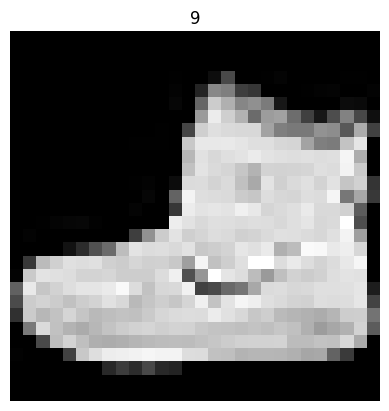

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

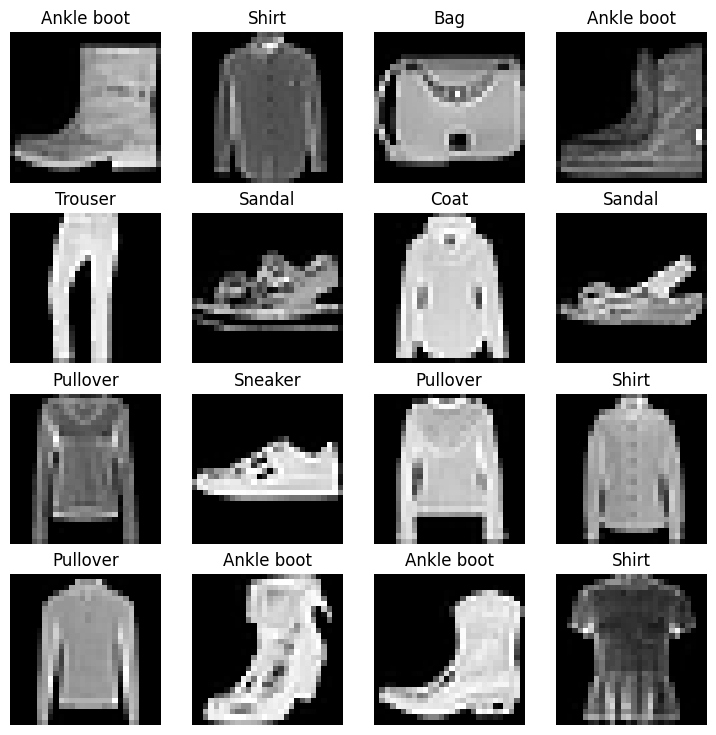

In [ ]:
#plot images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows , cols = 4 , 4
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0 , len(train_data), size =[1]).item()
  img, label = train_data[rand_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare dataloader

RIght now, our data in the form of pytoch dataset
dataloader turns to pythoniterable
More specifically we want to turn our data in to BatchSampler
why?
1 batch to save memeory  omputationally efficient
give nn to more chances for each epoch


In [ ]:
from torch.utils.data import DataLoader
#Setup the batch size hyperparam
BATACH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,batch_size=BATACH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATACH_SIZE, shuffle=False)

print(f"DataLoader :{ train_dataloader, test_dataloader}")
print(f" len of train datsloader :{ len(train_dataloader)} batches of {BATACH_SIZE}...")
print(f" len of test datsloader :{ len(test_dataloader)} batches of {BATACH_SIZE}...")





DataLoader :(<torch.utils.data.dataloader.DataLoader object at 0x7a2cf1d02650>, <torch.utils.data.dataloader.DataLoader object at 0x7a2cf4a56690>)
 len of train datsloader :1875 batches of 32...
 len of test datsloader :313 batches of 32...


In [ ]:
train_features_batch, train_labels_batch =next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Imge size: torch.Size([1, 28, 28])
Label: 6, label size : torch.Size([])


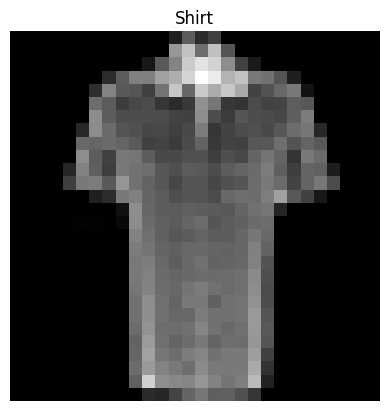

In [ ]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Imge size: {img.shape}")
print(f"Label: {label}, label size : {label.shape}")

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [72]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28, # this is 28*28
    hidden_units=10, # how mnay units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

##3 . Model 0 base line model

In [ ]:
#flatten lyer
flatten_model = nn.Flatten()


#Get a single sample
x=train_features_batch[0]

output=flatten_model(x)

print(output.shape)

torch.Size([1, 784])


In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end=float,
                     device:torch.device=None):
  total_time = end - start
  print(f" Train time on {device} : { total_time : 3f} seconds")
  return total_time

In [ ]:
print(len(train_dataloader))

1875


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs=3

train_time_start_on_cpu=timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  train_loss = 0

  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss+=loss#sum and calculate the loss for whole batch

    #3. ptimizer zero grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if batch%400 ==0:
      print(f" Looked at {batch*len(X)}/{len(train_dataloader.dataset)}samples.")
    #training loss
  train_loss/=len(train_dataloader)

  ##testing loop
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X)

      #loss
      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
  # Calculate the test loss and accuracy
  test_loss = test_loss/len(test_dataloader)
  test_acc = test_acc/len(test_dataloader)


  print(f"\n Train loss : {train_loss:.5f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.5f}")

  train_time_end_on_cpu = timer()

  total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                              end=train_time_end_on_cpu,
                                              device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

 Train loss : 0.47643 | Test loss : 0.48250 | Test acc : 82.99720
 Train time on cpu :  11.785367 seconds
Epoch: 1
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

 Train loss : 0.45556 | Test loss : 0.47251 | Test acc : 83.62620
 Train time on cpu :  23.319877 seconds
Epoch: 2
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

 Train loss : 0.44364 | Test loss : 0.47143 | Test acc : 83.57628
 Train time on cpu :  35.019575 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Return a dict contatin the resuls of model predictio on data loader ,"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"modelname": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc ": acc}
model_0_results = eval_model(model_0,test_dataloader,loss_fn,accuracy_fn)
model_0_results


{'modelname': 'FashionMNISTModelV0',
 'model_loss': 0.4714301824569702,
 'model_acc ': 83.57627795527156}

In [ ]:
import torch
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#6 model 1

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()

    )

  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

###6.2 Functionizin training and test loop
*trainstep()
*test_step()

In [ ]:
def train_step(model : torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """performs a train ing with model trying to ekarn on data_loader."""



  train_loss, train_acc = 0, 0
  model_0.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss+=loss#sum and calculate the loss for whole batch
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    #3. ptimizer zero grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if batch%400 ==0:
      print(f" Looked at {batch*len(X)}/{len(train_dataloader.dataset)}samples.")
    #training loss
  train_loss/=len(train_dataloader)
  train_acc = train_acc/len(train_dataloader)

  return {"train_loss": train_loss.item(),
          "train_acc": train_acc}

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
  """performs a testing with model trying to ekarn on data_loader."""
  model.eval()
  test_acc , test_loss =0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X,y = X.to(device), y.to(device)

      test_pred= model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    test_loss = test_loss/len(data_loader)
    test_acc = test_acc/len(data_loader)
    print(f"\nTest loss : {test_loss:.5f} | Test acc : {test_acc:.5f}")


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_cpu=timer()
epochs =3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n......")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_cpu = timer()

total_train_tiem_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
......
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.95636 | Test acc : 64.99601
Epoch: 1
......
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.72227 | Test acc : 73.91174
Epoch: 2
......
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.68500 | Test acc : 75.01997
 Train time on cpu :  37.631925 seconds


In [ ]:
model_0_results

{'modelname': 'FashionMNISTModelV0',
 'model_loss': 0.4714301824569702,
 'model_acc ': 83.57627795527156}

*Note* some times cpu calsluates faster that gpu
why?
https://horace.io/brrr_intro.html

In [73]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'modelname': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc ': 75.01996805111821}

In [125]:
import torch
from torch import nn
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that inherits from nn.Module

  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    return x

In [126]:
image.shape

torch.Size([1, 28, 28])

In [127]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [131]:
rand_image_tensor = torch.randn(size=(1,28,28)).to(device)
print(model_2(rand_image_tensor.unsqueeze(0)).shape)

torch.Size([1, 10])


###7.3 Setup a loss function and optimixer for model 2

In [133]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [137]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

train_time_start_cpu = timer()

epoch = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer= optimizer,
             accuracy_fn = accuracy_fn,
             device= device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn = accuracy_fn,
             device= device)
  train_time_end_cpu = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_cpu,
                                            end=train_time_end_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.31354 | Test acc : 88.96765
Epoch: 1
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.29671 | Test acc : 89.38698
Epoch: 2
-------
 Looked at 0/60000samples.
 Looked at 12800/60000samples.
 Looked at 25600/60000samples.
 Looked at 38400/60000samples.
 Looked at 51200/60000samples.

Test loss : 0.30494 | Test acc : 89.37700
 Train time on cpu :  174.210927 seconds


In [138]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'modelname': 'FashionMNISTModelV2',
 'model_loss': 0.3049408197402954,
 'model_acc ': 89.37699680511182}

In [139]:
#compare model results
import pandas as pd
compare_results = pd.DataFrame(data=[model_0_results,model_1_results,model_2_results])
compare_results

,modelname,model_loss,model_acc
0,FashionMNISTModelV0,0.471430,83.576278
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.304941,89.376997


In [145]:
#Add training time to results comparision
compare_results["train_time"] = [total_train_time_model_0, total_train_tiem_model_1, total_train_time_model_2]
compare_results

,modelname,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.471430,83.576278,35.019575
1,FashionMNISTModelV1,0.685001,75.019968,37.631925
2,FashionMNISTModelV2,0.304941,89.376997,174.210927


Text(0, 0.5, 'Model')

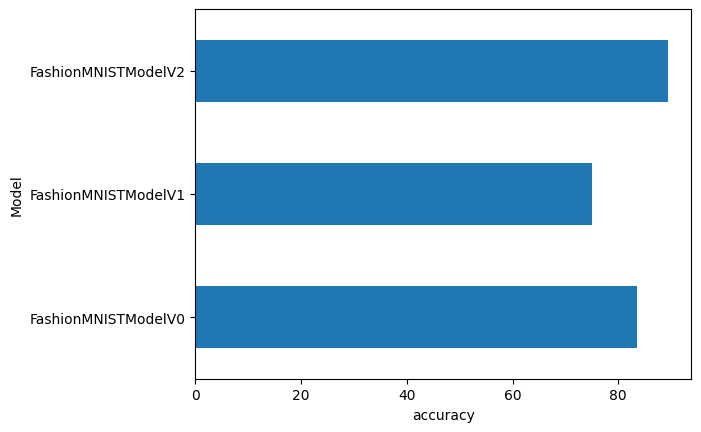

In [150]:
#Visualze our model results
compare_results.set_index("modelname")["model_acc "].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("Model")

In [151]:
###Make and eval random oprediction with best model

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample , dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)






In [153]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

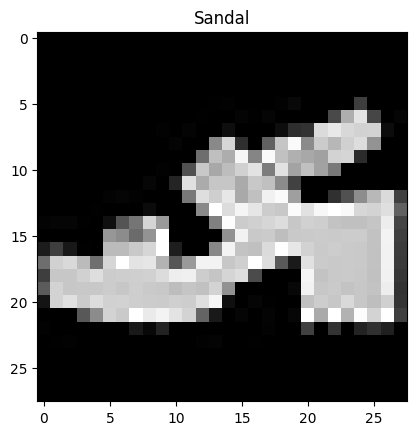

In [155]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [157]:
pred_probs = make_predictions(model_2,test_samples, device)



In [158]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 0, 7, 4, 3, 0, 4, 7, 1])

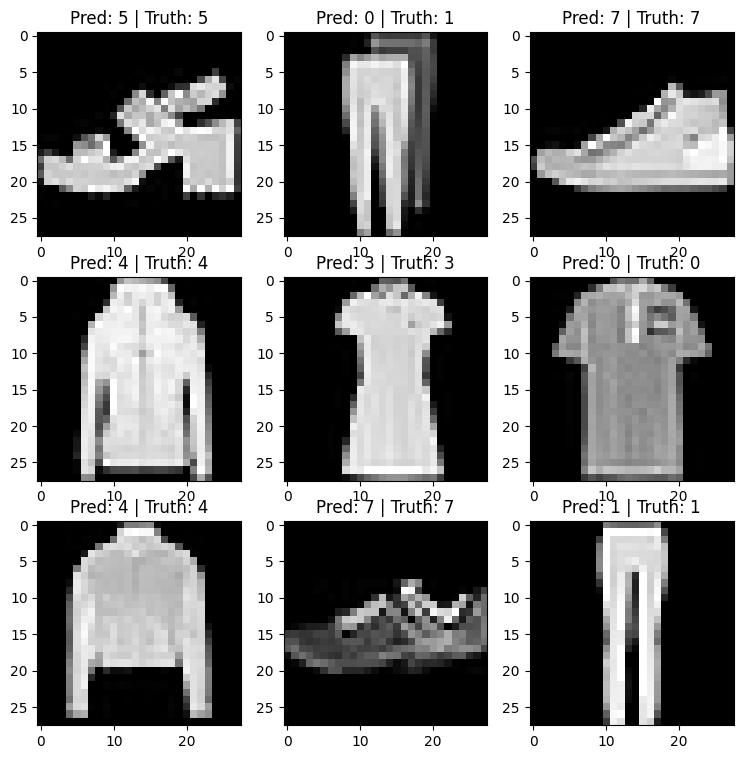

In [159]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  plt.title(f"Pred: {pred_classes[i]} | Truth: {test_labels[i]}")

##confusion metrics

In [162]:
from tqdm.auto import tqdm

#1Makw predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predction..."):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim= 0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predction...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 7])

In [163]:
import mlxtend
mlxtend.__version__

'0.23.4'

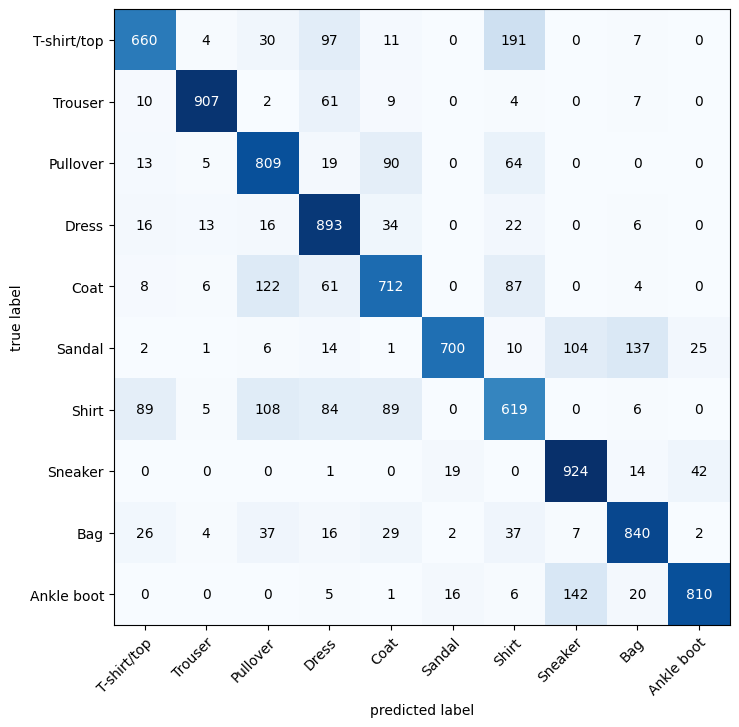

In [172]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# Get all true labels from the test_dataloader
y_true = torch.cat([y for X, y in test_dataloader])

cm = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
comfat_tensor = cm(y_pred_tensor, y_true)

fig, ax = plot_confusion_matrix(comfat_tensor.numpy(),

                                figsize=(8,8),
                                class_names=class_names)

In [175]:
from pathlib import Path
MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True,
                exist_ok=True)
MODEL_NAME= "03_pytorch_cv_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)
